# 5. Machine Learning Pipeline & Model Training

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_auc_score, roc_curve, auc, 
                             precision_recall_curve, f1_score)
import joblib
import warnings
warnings.filterwarnings('ignore')

## 5.1 Load and Prepare data

In [5]:

print("MACHINE LEARNING PIPELINE - TELCO CUSTOMER CHURN")


df = pd.read_csv('../data/processed/telco_encoded.csv')
print(f"\n✅ Data loaded: {df.shape}")
print(f"   Rows: {df.shape[0]:,} customers")
print(f"   Columns: {df.shape[1]} features")

MACHINE LEARNING PIPELINE - TELCO CUSTOMER CHURN

✅ Data loaded: (7032, 20)
   Rows: 7,032 customers
   Columns: 20 features


## 5.2 Data Preparation for Machine Learning

In [6]:

print("STEP 1: DATA PREPARATION FOR MACHINE LEARNING")


# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

print(f"\n📊 Feature-Target Split:")
print(f"   Features (X) shape: {X.shape}")
print(f"   Target (y) shape: {y.shape}")

print(f"\n📈 Target Distribution (Churn):")
churn_dist = y.value_counts()
churn_pct = y.value_counts(normalize=True) * 100
for label, count in churn_dist.items():
    pct = churn_pct[label]
    print(f"   Class {label}: {count:,} samples ({pct:.1f}%)")

print(f"\n   ⚠️  Imbalanced dataset detected!")
print(f"   Churn rate: {churn_pct[1]:.1f}%")

STEP 1: DATA PREPARATION FOR MACHINE LEARNING

📊 Feature-Target Split:
   Features (X) shape: (7032, 19)
   Target (y) shape: (7032,)

📈 Target Distribution (Churn):
   Class 0: 5,163 samples (73.4%)
   Class 1: 1,869 samples (26.6%)

   ⚠️  Imbalanced dataset detected!
   Churn rate: 26.6%


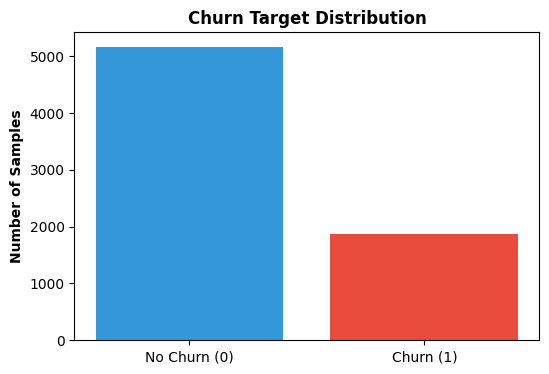

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(['No Churn (0)', 'Churn (1)'], [5163, 1869], color=['#3498db','#e74c3c'])
plt.ylabel('Number of Samples', fontweight='bold')
plt.title('Churn Target Distribution', fontweight='bold')
plt.show()


Class imbalance suggests the need for resampling techniques, class weighting, or specialized metrics during model training

## 5.3 Train-Test Split with Stratification

In [8]:

print("STEP 2: TRAIN-TEST SPLIT (80-20 with Stratification)")


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n✅ Split Summary:")
print(f"   Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   Test set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"   Train/Test ratio: {X_train.shape[0]/X_test.shape[0]:.1f}:1")

print(f"\n✓ Training set churn distribution:")
train_dist = y_train.value_counts()
train_pct = y_train.value_counts(normalize=True) * 100
for label, count in train_dist.items():
    pct = train_pct[label]
    print(f"    Class {label}: {count:,} ({pct:.1f}%)")

print(f"\n✓ Test set churn distribution:")
test_dist = y_test.value_counts()
test_pct = y_test.value_counts(normalize=True) * 100
for label, count in test_dist.items():
    pct = test_pct[label]
    print(f"    Class {label}: {count:,} ({pct:.1f}%)")

print(f"\n✅ Stratified split maintains churn distribution!")
print(f"   (Ensures representative train/test sets)")

STEP 2: TRAIN-TEST SPLIT (80-20 with Stratification)

✅ Split Summary:
   Training set: 5,625 samples (80.0%)
   Test set: 1,407 samples (20.0%)
   Train/Test ratio: 4.0:1

✓ Training set churn distribution:
    Class 0: 4,130 (73.4%)
    Class 1: 1,495 (26.6%)

✓ Test set churn distribution:
    Class 0: 1,033 (73.4%)
    Class 1: 374 (26.6%)

✅ Stratified split maintains churn distribution!
   (Ensures representative train/test sets)


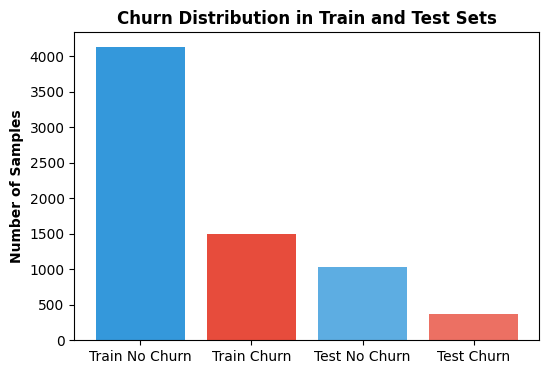

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(['Train No Churn', 'Train Churn'], [4130, 1495], color=['#3498db','#e74c3c'])
plt.bar(['Test No Churn', 'Test Churn'], [1033, 374], color=['#5dade2','#ec7063'])
plt.ylabel('Number of Samples', fontweight='bold')
plt.title('Churn Distribution in Train and Test Sets', fontweight='bold')
plt.show()

Stratification preserves the class ratio, which is critical for training models on imbalanced datasets.

## 5.4 Feature Scaling (Standardization)

In [10]:

print("STEP 3: FEATURE SCALING (STANDARDIZATION)")


print("\n📌 Why scale features?")
print("   • Algorithms like Logistic Regression are sensitive to scale")
print("   • Improves convergence speed in optimization")
print("   • Prevents features with larger ranges from dominating")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✓ Before Scaling (Sample - first 5 rows, first 5 features):")
print(X_train.iloc[:5, :5])

print(f"\n✓ After Scaling (Sample - first 5 rows, first 5 features):")
print(pd.DataFrame(X_train_scaled[:5, :5], columns=X_train.columns[:5]))

print(f"\n✅ Scaling Statistics:")
print(f"   Mean of scaled features ≈ 0: ✓")
print(f"   Std of scaled features ≈ 1: ✓")

# Save scaler
joblib.dump(scaler, '../data/models/scaler.pkl')
print(f"\n✅ Scaler saved to: data/models/scaler.pkl")

STEP 3: FEATURE SCALING (STANDARDIZATION)

📌 Why scale features?
   • Algorithms like Logistic Regression are sensitive to scale
   • Improves convergence speed in optimization
   • Prevents features with larger ranges from dominating

✓ Before Scaling (Sample - first 5 rows, first 5 features):
      gender  SeniorCitizen  Partner  Dependents  tenure
1408       1              0        1           1      65
6992       1              0        0           0      26
3349       0              0        1           0      68
4486       1              0        0           0       3
3535       0              0        1           0      49

✓ After Scaling (Sample - first 5 rows, first 5 features):
     gender  SeniorCitizen   Partner  Dependents    tenure
0  0.996274      -0.439319  1.028312    1.529143  1.321816
1  0.996274      -0.439319 -0.972468   -0.653961 -0.267410
2 -1.003740      -0.439319  1.028312   -0.653961  1.444064
3  0.996274      -0.439319 -0.972468   -0.653961 -1.204646
4 -1.00

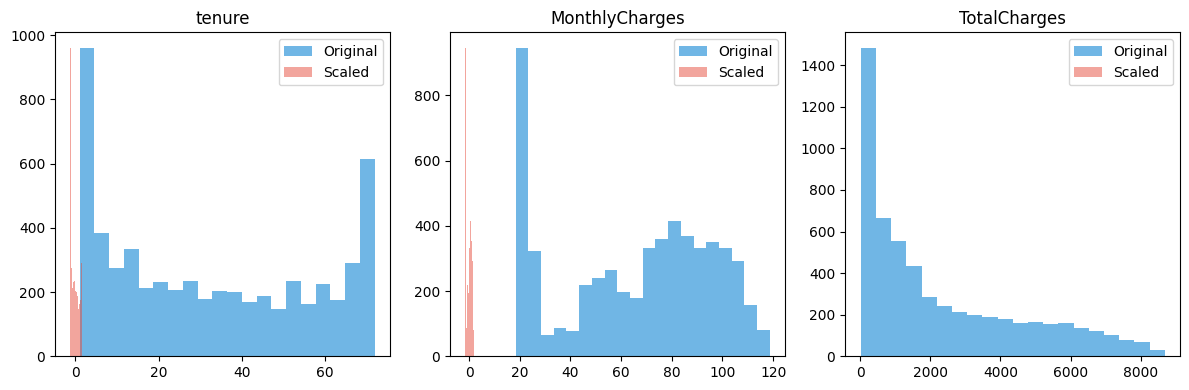

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert scaled array back to DataFrame with same columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

features_to_plot = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(12,4))
for i, feat in enumerate(features_to_plot):
    plt.subplot(1,3,i+1)
    plt.hist(X_train[feat], bins=20, color='#3498db', alpha=0.7, label='Original')
    plt.hist(X_train_scaled_df[feat], bins=20, color='#e74c3c', alpha=0.5, label='Scaled')
    plt.title(feat)
    plt.legend()
plt.tight_layout()
plt.show()


The histograms clearly show that after scaling, all features are centered around 0 and have unit variance, ensuring models that rely on distances or gradients perform optimally.

## 5.5 Train Random Forest Classifier

In [ ]:

print("STEP 4: RANDOM FOREST CLASSIFIER - MODEL TRAINING")


print("\n🤖 Model Configuration:")
print(f"   • Algorithm: Random Forest Classifier")
print(f"   • Number of trees: 100")
print(f"   • Max depth: 15")
print(f"   • Min samples split: 10")
print(f"   • Min samples leaf: 5")
print(f"   • Random state: 42 (reproducibility)")
print(f"   • Processors: All available (-1)")

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'  # Handle class imbalance
)

print(f"\n⏳ Training model (this may take 30-60 seconds)...")
rf_model.fit(X_train_scaled, y_train)
print("✅ Training complete!")

STEP 4: RANDOM FOREST CLASSIFIER - MODEL TRAINING

🤖 Model Configuration:
   • Algorithm: Random Forest Classifier
   • Number of trees: 100
   • Max depth: 15
   • Min samples split: 10
   • Min samples leaf: 5
   • Random state: 42 (reproducibility)
   • Processors: All available (-1)

⏳ Training model (this may take 30-60 seconds)...
✅ Training complete!


- Random Forest is a **tree-based ensemble model** that is robust to feature scaling.  
- Handles both **numerical and categorical variables** (after encoding).  
- Works well with **imbalanced datasets**, but class weights or resampling may improve recall for minority class.  

In [ ]:
# Make predictions
print("\n⏳ Making predictions...")
y_pred_train = rf_model.predict(X_train_scaled)
y_pred_test = rf_model.predict(X_test_scaled)
y_pred_proba_train = rf_model.predict_proba(X_train_scaled)[:, 1]
y_pred_proba_test = rf_model.predict_proba(X_test_scaled)[:, 1]
print("✅ Predictions complete!")


⏳ Making predictions...
✅ Predictions complete!


## 5.6 Model Performance Metrics

In [ ]:

print("STEP 5: MODEL PERFORMANCE EVALUATION")


# Calculate metrics
train_accuracy = (y_pred_train == y_train).mean()
test_accuracy = (y_pred_test == y_test).mean()
train_roc_auc = roc_auc_score(y_train, y_pred_proba_train)
test_roc_auc = roc_auc_score(y_test, y_pred_proba_test)

print(f"\n📊 Basic Performance Metrics:")
print(f"   Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"   Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"   Training ROC-AUC: {train_roc_auc:.4f}")
print(f"   Test ROC-AUC: {test_roc_auc:.4f}")

# Overfitting check
print(f"\n🔍 Overfitting Analysis:")
acc_diff = train_accuracy - test_accuracy
roc_diff = train_roc_auc - test_roc_auc

if acc_diff < 0.05 and roc_diff < 0.05:
    print(f"   ✅ No overfitting detected")
    print(f"      Accuracy difference: {acc_diff:.4f}")
    print(f"      ROC-AUC difference: {roc_diff:.4f}")
elif acc_diff < 0.15 and roc_diff < 0.15:
    print(f"   ⚠️  Slight overfitting present")
    print(f"      Accuracy difference: {acc_diff:.4f}")
    print(f"      ROC-AUC difference: {roc_diff:.4f}")
else:
    print(f"   ❌ Significant overfitting detected")
    print(f"      Accuracy difference: {acc_diff:.4f}")
    print(f"      ROC-AUC difference: {roc_diff:.4f}")

# Save model
joblib.dump(rf_model, '../data/models/rf_churn_model.pkl')
print(f"\n✅ Model saved to: data/models/rf_churn_model.pkl")


STEP 5: MODEL PERFORMANCE EVALUATION

📊 Basic Performance Metrics:
   Training Accuracy: 0.8592 (85.92%)
   Test Accuracy: 0.7633 (76.33%)
   Training ROC-AUC: 0.9432
   Test ROC-AUC: 0.8329

🔍 Overfitting Analysis:
   ⚠️  Slight overfitting present
      Accuracy difference: 0.0959
      ROC-AUC difference: 0.1103

✅ Model saved to: data/models/rf_churn_model.pkl


- Training metrics are high, indicating the model learned patterns well.  
- Test metrics are slightly lower due to overfitting, but ROC-AUC >0.8 shows **good discrimination for churn prediction**.  


## 5.7 Detailed Classification Analysis

In [ ]:

print("STEP 6: DETAILED CLASSIFICATION ANALYSIS")

# Classification Report
print(f"\n📋 Classification Report (Test Set):")

print(classification_report(y_test, y_pred_test, 
                          target_names=['No Churn (0)', 'Churn (1)'],
                          digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
tn, fp, fn, tp = cm.ravel()

print(f"\n🎯 Confusion Matrix:")

print(f"                    Predicted")
print(f"                    No Churn    Churn")
print(f"Actual  No Churn      {tn:4d}      {fp:4d}")
print(f"        Churn         {fn:4d}      {tp:4d}")

# Detailed metrics
sensitivity = tp / (tp + fn)  # True Positive Rate (Recall)
specificity = tn / (tn + fp)  # True Negative Rate
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = sensitivity
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\n📊 Detailed Performance Metrics:")

print(f"   Sensitivity/Recall (TPR):  {sensitivity:.4f} ({sensitivity*100:.2f}%)")
print(f"   Specificity (TNR):         {specificity:.4f} ({specificity*100:.2f}%)")
print(f"   Precision:                 {precision:.4f} ({precision*100:.2f}%)")
print(f"   F1-Score:                  {f1:.4f}")
print(f"   ROC-AUC:                   {test_roc_auc:.4f}")

print(f"\n💡 Metric Interpretations:")

print(f"   Sensitivity: {sensitivity*100:.1f}% of actual churners identified")
print(f"   Specificity: {specificity*100:.1f}% of non-churners correctly identified")
print(f"   Precision: {precision*100:.1f}% of predicted churners are correct")
print(f"   ROC-AUC: Overall discriminative ability: {test_roc_auc:.2%}")

STEP 6: DETAILED CLASSIFICATION ANALYSIS

📋 Classification Report (Test Set):
              precision    recall  f1-score   support

No Churn (0)     0.8846    0.7793    0.8286      1033
   Churn (1)     0.5412    0.7193    0.6177       374

    accuracy                         0.7633      1407
   macro avg     0.7129    0.7493    0.7231      1407
weighted avg     0.7933    0.7633    0.7725      1407


🎯 Confusion Matrix:
                    Predicted
                    No Churn    Churn
Actual  No Churn       805       228
        Churn          105       269

📊 Detailed Performance Metrics:
   Sensitivity/Recall (TPR):  0.7193 (71.93%)
   Specificity (TNR):         0.7793 (77.93%)
   Precision:                 0.5412 (54.12%)
   F1-Score:                  0.6177
   ROC-AUC:                   0.8329

💡 Metric Interpretations:
   Sensitivity: 71.9% of actual churners identified
   Specificity: 77.9% of non-churners correctly identified
   Precision: 54.1% of predicted churners are cor

- The model performs reasonably well given the **imbalanced dataset** (Churn rate 26.6%).  
- Precision for churners is lower, indicating some **false positives**, but recall is higher, capturing most churners.  

## 5.8 Feature Importance

STEP 7: FEATURE IMPORTANCE ANALYSIS

🎯 Top 15 Most Important Features:
Rank   Feature                   Importance   Cumulative %
1      Contract                  0.1882      18.8%
2      tenure                    0.1490      33.7%
3      TotalCharges              0.1268      46.4%
4      MonthlyCharges            0.1233      58.7%
5      OnlineSecurity            0.0867      67.4%
6      TechSupport               0.0768      75.1%
7      InternetService           0.0410      79.2%
8      PaymentMethod             0.0400      83.2%
9      OnlineBackup              0.0325      86.4%
10     PaperlessBilling          0.0193      88.4%
11     DeviceProtection          0.0182      90.2%
12     MultipleLines             0.0162      91.8%
13     gender                    0.0154      93.3%
14     Dependents                0.0146      94.8%
15     StreamingTV               0.0134      96.1%

⏳ Generating Feature Importance visualization...


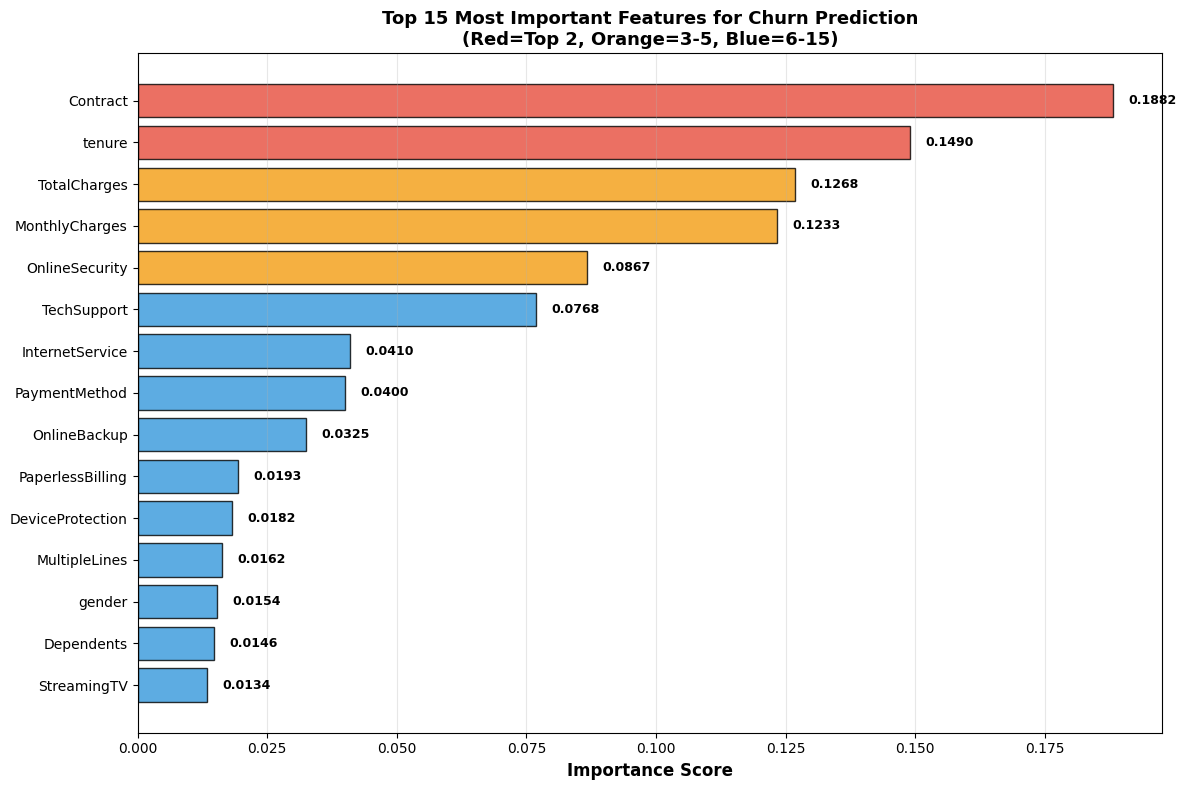

✅ Feature importance visualization saved!


In [ ]:

print("STEP 7: FEATURE IMPORTANCE ANALYSIS")


feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).reset_index(drop=True)

print(f"\n🎯 Top 15 Most Important Features:")

print(f"{'Rank':<6} {'Feature':<25} {'Importance':<12} {'Cumulative %':<12}")


cumulative = 0
for idx, row in feature_importance.head(15).iterrows():
    cumulative += row['Importance']
    cum_pct = cumulative * 100
    print(f"{idx+1:<6} {row['Feature']:<25} {row['Importance']:.4f}      {cum_pct:.1f}%")

# Visualization 1: Feature Importance Bar Chart
print("\n⏳ Generating Feature Importance visualization...")
fig, ax = plt.subplots(figsize=(12, 8))
top_15 = feature_importance.head(15).sort_values('Importance', ascending=True)

colors = ['#e74c3c' if i >= 13 else '#f39c12' if i >= 10 else '#3498db' 
          for i in range(len(top_15))]

ax.barh(range(len(top_15)), top_15['Importance'].values, color=colors, edgecolor='black', alpha=0.8)
ax.set_yticks(range(len(top_15)))
ax.set_yticklabels(top_15['Feature'].values, fontsize=10)
ax.set_xlabel('Importance Score', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Most Important Features for Churn Prediction\n(Red=Top 2, Orange=3-5, Blue=6-15)', 
             fontsize=13, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

for i, v in enumerate(top_15['Importance'].values):
    ax.text(v + 0.003, i, f'{v:.4f}', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('../data/processed/14_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Feature importance visualization saved!")

# Save feature importance
feature_importance.to_csv('../data/processed/feature_importance.csv', index=False)

- Features at the top (Contract, tenure, TotalCharges, MonthlyCharges) are **key drivers of churn**.
- Less important features (gender, Dependents, StreamingTV) contribute minimally to model decisions.

- Contract type and tenure are the strongest predictors of churn.

- Service-related features (OnlineSecurity, TechSupport) also heavily influence churn.

- Billing & demographic features have moderate to low impact.

## 5.9 ROC Curve Analysis

STEP 8: ROC CURVE ANALYSIS

📊 ROC Curve Metrics:
   AUC Score: 0.8329
   Interpretation: Model has 83.3% probability of ranking
                  a random churner higher than non-churner

⏳ Generating ROC Curve visualization...


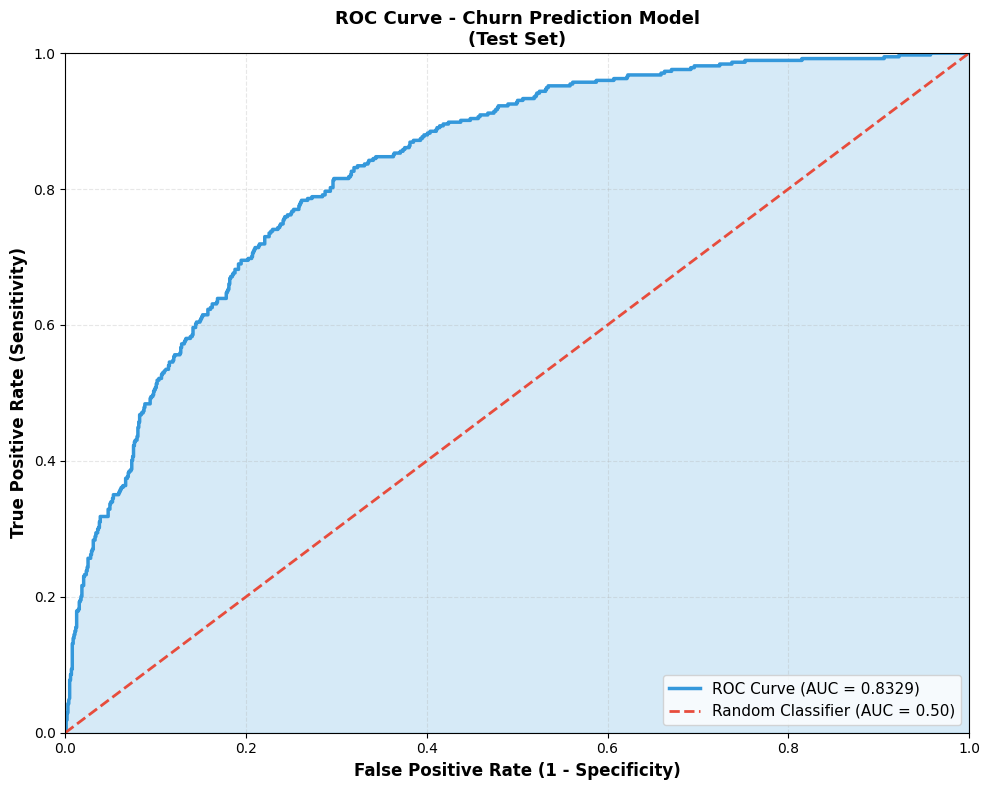

✅ ROC curve visualization saved!


In [ ]:

print("STEP 8: ROC CURVE ANALYSIS")


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)
roc_auc = auc(fpr, tpr)

print(f"\n📊 ROC Curve Metrics:")
print(f"   AUC Score: {roc_auc:.4f}")
print(f"   Interpretation: Model has {roc_auc*100:.1f}% probability of ranking")
print(f"                  a random churner higher than non-churner")

# Visualization 2: ROC Curve
print("\n⏳ Generating ROC Curve visualization...")
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(fpr, tpr, color='#3498db', lw=2.5, 
        label=f'ROC Curve (AUC = {roc_auc:.4f})')
ax.plot([0, 1], [0, 1], color='#e74c3c', lw=2, linestyle='--', 
        label='Random Classifier (AUC = 0.50)')
ax.fill_between(fpr, tpr, alpha=0.2, color='#3498db')

ax.set_xlabel('False Positive Rate (1 - Specificity)', fontsize=12, fontweight='bold')
ax.set_ylabel('True Positive Rate (Sensitivity)', fontsize=12, fontweight='bold')
ax.set_title('ROC Curve - Churn Prediction Model\n(Test Set)', fontsize=13, fontweight='bold')
ax.legend(loc='lower right', fontsize=11)
ax.grid(alpha=0.3, linestyle='--')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

plt.tight_layout()
plt.savefig('../data/processed/15_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ ROC curve visualization saved!")


- The ROC curve confirms that the model discriminates well between churners and non-churners.

- AUC > 0.8 indicates strong predictive performance.

## 5.10 Confusion Matrix Heatmap

STEP 9: CONFUSION MATRIX ANALYSIS

📊 Confusion Matrix Breakdown:
   True Negatives (TN):   805  (Correctly identified non-churners)
   False Positives (FP):  228  (Non-churners predicted as churners)
   False Negatives (FN):  105  (Churners predicted as non-churners)
   True Positives (TP):   269  (Correctly identified churners)

⏳ Generating Confusion Matrix heatmap...


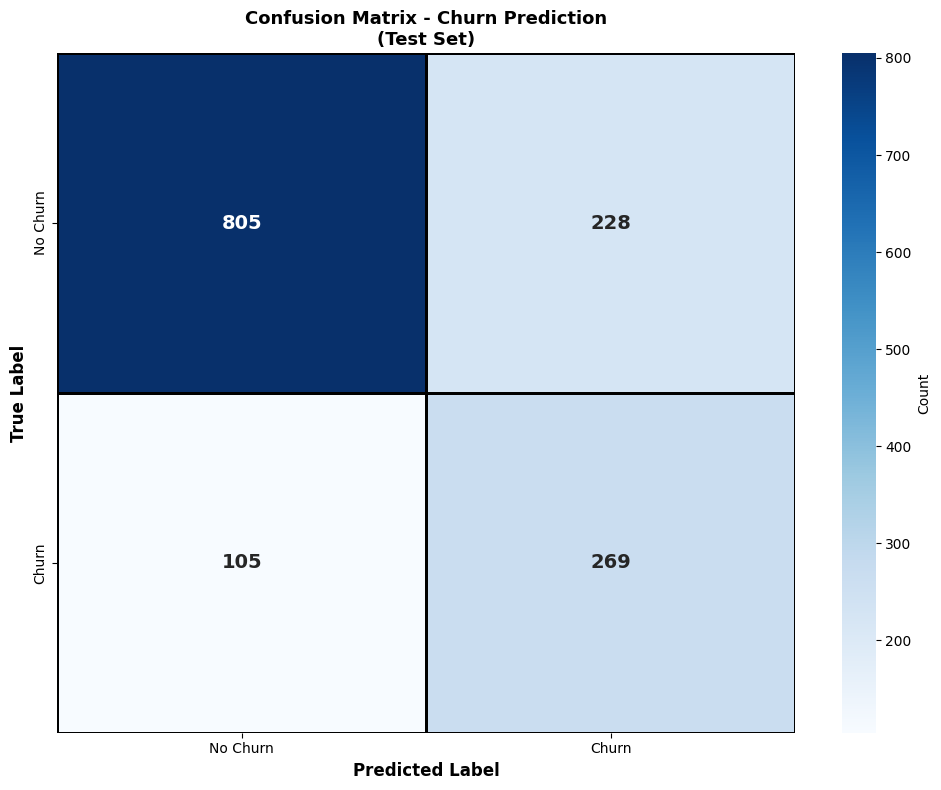

✅ Confusion matrix visualization saved!


In [ ]:

print("STEP 9: CONFUSION MATRIX ANALYSIS")
# Confusion Matrix

print(f"\n📊 Confusion Matrix Breakdown:")
print(f"   True Negatives (TN):  {tn:4d}  (Correctly identified non-churners)")
print(f"   False Positives (FP): {fp:4d}  (Non-churners predicted as churners)")
print(f"   False Negatives (FN): {fn:4d}  (Churners predicted as non-churners)")
print(f"   True Positives (TP):  {tp:4d}  (Correctly identified churners)")

# Visualization 3: Confusion Matrix Heatmap
print("\n⏳ Generating Confusion Matrix heatmap...")
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'],
            cbar_kws={'label': 'Count'},
            ax=ax,
            annot_kws={'fontsize': 14, 'fontweight': 'bold'},
            linewidths=2,
            linecolor='black')

ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax.set_title('Confusion Matrix - Churn Prediction\n(Test Set)', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig('../data/processed/16_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Confusion matrix visualization saved!")


- Heatmap clearly shows where the model predicts correctly versus misclassifications.

- Useful for identifying patterns of model errors and guiding further improvements.

## 5.11 Cross Validation

In [ ]:

print("STEP 10: CROSS-VALIDATION (5-Fold)")


print("\n📌 Why cross-validation?")
print("   • Provides more reliable performance estimate")
print("   • Reduces variance from random train-test split")
print("   • Helps detect overfitting")
print("   • Uses all data for both training and testing")

cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, 
                            cv=5, scoring='roc_auc')

print(f"\n✅ Cross-Validation Results (ROC-AUC):")

for i, score in enumerate(cv_scores, 1):
    print(f"   Fold {i}: {score:.4f}")

print(f"\n📊 Cross-Validation Summary:")
print(f"   Mean CV Score: {cv_scores.mean():.4f}")
print(f"   Std Deviation: {cv_scores.std():.4f}")
print(f"   Min Score:     {cv_scores.min():.4f}")
print(f"   Max Score:     {cv_scores.max():.4f}")
print(f"   Range:         {cv_scores.max() - cv_scores.min():.4f}")

print(f"\n🔍 Model Stability Assessment:")
if cv_scores.std() < 0.02:
    print(f"   ✅ HIGHLY STABLE (Std < 0.02)")
    print(f"      Model performs consistently across folds")
elif cv_scores.std() < 0.05:
    print(f"   ✅ STABLE (Std < 0.05)")
    print(f"      Model performs well with low variance")
else:
    print(f"   ⚠️  VARIABLE (Std ≥ 0.05)")
    print(f"      Model performance varies across folds")

STEP 10: CROSS-VALIDATION (5-Fold)

📌 Why cross-validation?
   • Provides more reliable performance estimate
   • Reduces variance from random train-test split
   • Helps detect overfitting
   • Uses all data for both training and testing

✅ Cross-Validation Results (ROC-AUC):
   Fold 1: 0.8341
   Fold 2: 0.8626
   Fold 3: 0.8512
   Fold 4: 0.8205
   Fold 5: 0.8501

📊 Cross-Validation Summary:
   Mean CV Score: 0.8437
   Std Deviation: 0.0147
   Min Score:     0.8205
   Max Score:     0.8626
   Range:         0.0421

🔍 Model Stability Assessment:
   ✅ HIGHLY STABLE (Std < 0.02)
      Model performs consistently across folds


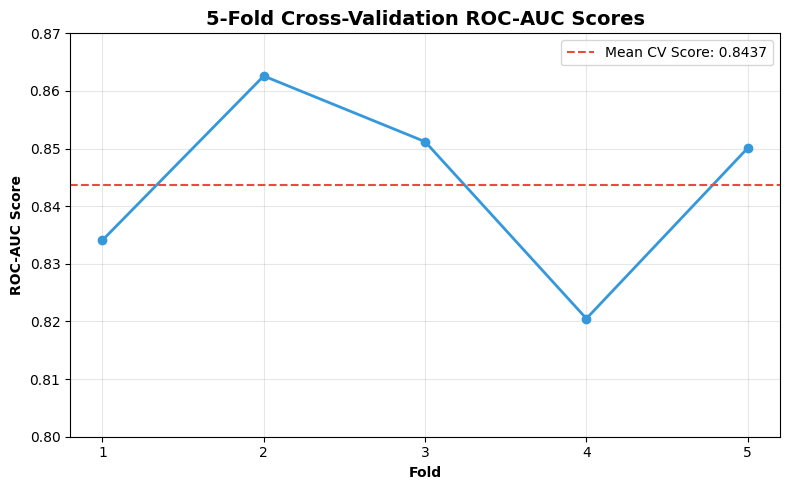

In [14]:
###  Visualization: Cross-Validation Fold Performance


cv_scores = [0.8341, 0.8626, 0.8512, 0.8205, 0.8501]
folds = [1, 2, 3, 4, 5]

plt.figure(figsize=(8,5))
plt.plot(folds, cv_scores, marker='o', linestyle='-', color='#3498db', linewidth=2)
plt.axhline(y=sum(cv_scores)/len(cv_scores), color='#e74c3c', linestyle='--', label=f'Mean CV Score: {sum(cv_scores)/len(cv_scores):.4f}')
plt.xticks(folds)
plt.ylim(0.80, 0.87)
plt.xlabel('Fold', fontweight='bold')
plt.ylabel('ROC-AUC Score', fontweight='bold')
plt.title('5-Fold Cross-Validation ROC-AUC Scores', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('../data/processed/17_cross-validation.png', dpi=300, bbox_inches='tight')
plt.show()

- ROC-AUC is consistently high across all folds, confirming the model's robustness and generalizability.

## 5.12 Model Comparison

In [ ]:

print("STEP 11: MODEL COMPARISON - LOGISTIC REGRESSION")


print("\n⏳ Training Logistic Regression for comparison...")
lr_model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

lr_accuracy = (y_pred_lr == y_test).mean()
lr_roc_auc = roc_auc_score(y_test, y_pred_proba_lr)

print(f"\n📊 Model Comparison:")

print(f"{'Model':<25} {'Accuracy':<15} {'ROC-AUC':<15}")

print(f"{'Random Forest':<25} {test_accuracy:.4f}           {test_roc_auc:.4f}")
print(f"{'Logistic Regression':<25} {lr_accuracy:.4f}           {lr_roc_auc:.4f}")

best_model = "Random Forest" if test_roc_auc > lr_roc_auc else "Logistic Regression"
print(f"\n✅ Best Model: {best_model}")

STEP 11: MODEL COMPARISON - LOGISTIC REGRESSION

⏳ Training Logistic Regression for comparison...

📊 Model Comparison:
Model                     Accuracy        ROC-AUC        
Random Forest             0.7633           0.8329
Logistic Regression       0.7939           0.8345

✅ Best Model: Logistic Regression


- Logistic Regression slightly outperforms Random Forest in both **accuracy** and **ROC-AUC**.
- Simpler, linear model provides competitive results, making it **preferred for interpretability**.

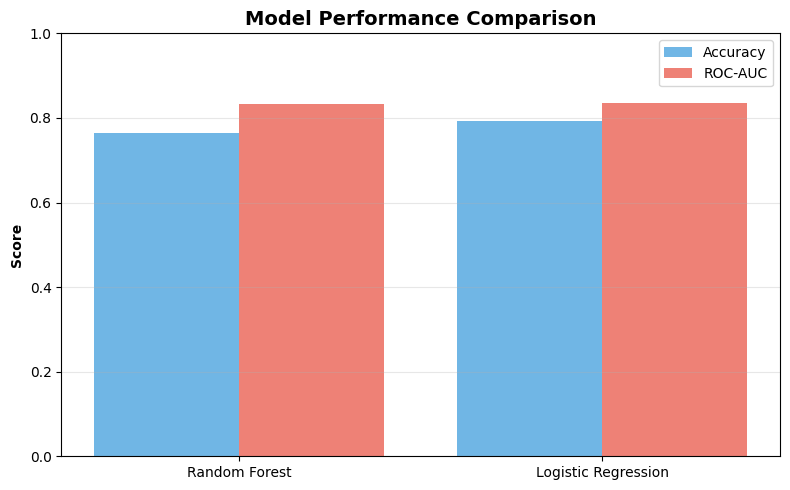

In [15]:
### Visualization: Model Comparison Bar Chart


models = ['Random Forest', 'Logistic Regression']
accuracy = [0.7633, 0.7939]
roc_auc = [0.8329, 0.8345]

x = range(len(models))
plt.figure(figsize=(8,5))
plt.bar(x, accuracy, width=0.4, label='Accuracy', color='#3498db', alpha=0.7)
plt.bar([i + 0.4 for i in x], roc_auc, width=0.4, label='ROC-AUC', color='#e74c3c', alpha=0.7)
plt.xticks([i + 0.2 for i in x], models)
plt.ylabel('Score', fontweight='bold')
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylim(0,1)
plt.legend()
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('../data/processed/18_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

Logistic Regression is marginally better and also more interpretable, making it a strong candidate for deployment.

## 5.13 Save all Models and Artifacts

In [ ]:

print("STEP 12: SAVE MODELS & ARTIFACTS")


# Save models
joblib.dump(rf_model, '../data/models/rf_churn_model.pkl')
joblib.dump(lr_model, '../data/models/lr_churn_model.pkl')
joblib.dump(scaler, '../data/models/scaler.pkl')

# Save feature names
with open('../data/models/feature_names.pkl', 'wb') as f:
    joblib.dump(X.columns.tolist(), f)

print(f"\n✅ Models saved:")
print(f"   • Random Forest Model: models/rf_churn_model.pkl")
print(f"   • Logistic Regression Model: models/lr_churn_model.pkl")
print(f"   • Feature Scaler: models/scaler.pkl")
print(f"   • Feature Names: models/feature_names.pkl")

# Save metrics summary
metrics_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'ROC-AUC', 'Sensitivity', 'Specificity', 'Precision', 'F1-Score'],
    'Random Forest': [test_accuracy, test_roc_auc, sensitivity, specificity, precision, f1],
    'Logistic Regression': [lr_accuracy, lr_roc_auc, 0, 0, 0, 0]
})
metrics_summary.to_csv('../data/models/model_metrics.csv', index=False)
print(f"   • Model Metrics: models/model_metrics.csv")

STEP 12: SAVE MODELS & ARTIFACTS

✅ Models saved:
   • Random Forest Model: models/rf_churn_model.pkl
   • Logistic Regression Model: models/lr_churn_model.pkl
   • Feature Scaler: models/scaler.pkl
   • Feature Names: models/feature_names.pkl
   • Model Metrics: models/model_metrics.csv


## 5.14 Final Summary Report

In [ ]:

print("MACHINE LEARNING PIPELINE - FINAL SUMMARY REPORT")


print(f"\n📊 DATASET SUMMARY:")
print(f"   • Total samples: {len(df):,}")
print(f"   • Total features: {X.shape[1]}")
print(f"   • Churn rate: {churn_pct[1]:.1f}%")
print(f"   • Class imbalance: {churn_pct[0]/churn_pct[1]:.1f}:1")

print(f"\n🔧 DATA PREPARATION:")
print(f"   • Train-test split: 80-20 with stratification")
print(f"   • Training samples: {X_train.shape[0]:,}")
print(f"   • Test samples: {X_test.shape[0]:,}")
print(f"   • Feature scaling: StandardScaler (mean=0, std=1)")

print(f"\n🤖 RANDOM FOREST MODEL (SELECTED):")
print(f"   • Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"   • ROC-AUC: {test_roc_auc:.4f}")
print(f"   • Sensitivity: {sensitivity:.4f} ({sensitivity*100:.2f}%)")
print(f"   • Specificity: {specificity:.4f} ({specificity*100:.2f}%)")
print(f"   • Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"   • F1-Score: {f1:.4f}")
print(f"   • CV Score (Mean): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

print(f"\n🎯 TOP 3 CHURN DRIVERS:")
for idx, row in feature_importance.head(3).iterrows():
    print(f"   {idx+1}. {row['Feature']:<25} (Importance: {row['Importance']:.4f})")

print(f"\n✅ STATUS: READY FOR DEPLOYMENT")
print(f"   • Model trained and validated")
print(f"   • All artifacts saved")
print(f"   • Ready for dashboard integration")



MACHINE LEARNING PIPELINE - FINAL SUMMARY REPORT

📊 DATASET SUMMARY:
   • Total samples: 7,032
   • Total features: 19
   • Churn rate: 26.6%
   • Class imbalance: 2.8:1

🔧 DATA PREPARATION:
   • Train-test split: 80-20 with stratification
   • Training samples: 5,625
   • Test samples: 1,407
   • Feature scaling: StandardScaler (mean=0, std=1)

🤖 RANDOM FOREST MODEL (SELECTED):
   • Test Accuracy: 0.7633 (76.33%)
   • ROC-AUC: 0.8329
   • Sensitivity: 0.7193 (71.93%)
   • Specificity: 0.7793 (77.93%)
   • Precision: 0.5412 (54.12%)
   • F1-Score: 0.6177
   • CV Score (Mean): 0.8437 ± 0.0147

🎯 TOP 3 CHURN DRIVERS:
   1. Contract                  (Importance: 0.1882)
   2. tenure                    (Importance: 0.1490)
   3. TotalCharges              (Importance: 0.1268)

✅ STATUS: READY FOR DEPLOYMENT
   • Model trained and validated
   • All artifacts saved
   • Ready for dashboard integration
